In [13]:
%matplotlib inline
from pylab import *
import csv
import pandas as pd

## La base de datos utilizada para esta práctica alude a un estudio sobre depredación de semillas en la Reserva de la Biosfera Sierra de Manantlán. Contiene la descripción para tres sitios (gradientes altitudinales) dentro de la RBSM.

In [24]:
#abrimos la base con la que vamos a trabajar
db = pd.read_csv('db.csv')
db.head()

,Especie,Acronimo,Poblacion,Sitio,Paraje,Altitud,Exposicion,Pendiente,Cantidad Luz,Adultos,Juveniles,Tipo de vegetacion,Posicion topografica,Este,Norte,Fecha caracterizacion,Observaciones
0,Q. nixoniana,Qnx,3,1,Almial,2159,NE,5.0,580.0,2.0,59.0,QQ,LA,578690,2163575,28-ene-19,NaN
1,Q. nixoniana,Qnx,3,2,Mirador,2100,SO,80.0,1140.0,1.0,0.0,PQ,LM,577007,2165135,28-ene-19,NaN
2,Q. nixoniana,Qnx,3,3,Mirador,2069,NO,40.0,203.0,4.0,1.0,QQ,LM,576986,2165383,28-ene-19,NaN
3,Q. nixoniana,Qnx,2,1,Corralitos,1830,SO,48.0,811.0,1.0,23.0,VS,LM,572733,2168350,27-ene-19,NaN
4,Q. nixoniana,Qnx,1,1,Puerto Martinez,1386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,577159,2160893,NaN,NaN


In [44]:
db.shape

(42, 17)

In [30]:
db.tail()

,Especie,Acronimo,Poblacion,Sitio,Paraje,Altitud,Exposicion,Pendiente,Cantidad Luz,Adultos,Juveniles,Tipo de vegetacion,Posicion topografica,Este,Norte,Fecha caracterizacion,Observaciones
37,P. hintonii,Phn,2,2,Barbecho las Burras,1957,N,10.0,1211.0,2.0,1.0,VS,LM,575453,2165677,26-ene-19,NaN
38,P. hintonii,Phn,2,3,Las Joyas,1946,NO,4.0,1234.0,2.0,0.0,VS,LM,576082,2165797,26-ene-19,NaN
39,P. hintonii,Phn,1,1,La Cumbre,1785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,572641,2168898,NaN,NaN
40,P. hintonii,Phn,1,2,La Troconera,1714,SE,65.0,279.0,15.0,5.0,MM,LM,570032,2171486,29-ene-19,NaN
41,P. hintonii,Phn,1,3,La Troconera,1695,E,13.0,222.0,2.0,2.0,MM,LM,569955,2171642,29-ene-19,NaN


In [27]:
db.dtypes

Especie                   object
Acronimo                  object
Poblacion                  int64
Sitio                      int64
Paraje                    object
Altitud                    int64
Exposicion                object
Pendiente                float64
Cantidad Luz             float64
Adultos                  float64
Juveniles                float64
Tipo de vegetacion        object
Posicion topografica      object
Este                       int64
Norte                      int64
Fecha caracterizacion     object
Observaciones             object
dtype: object

### Explorando los datos

In [31]:
db.describe()

,Poblacion,Sitio,Altitud,Pendiente,Cantidad Luz,Adultos,Juveniles,Este,Norte
count,42.000000,42.000000,42.000000,38.000000,38.000000,38.000000,38.000000,42.000000,4.200000e+01
mean,2.238095,1.952381,1918.928571,30.289474,559.447368,3.894737,9.315789,576011.261905,2.165811e+06
std,0.758996,0.824987,240.650784,24.099914,470.035864,4.881235,15.237055,2786.169606,2.859935e+03
min,1.000000,1.000000,1154.000000,2.000000,10.000000,1.000000,0.000000,569955.000000,2.159429e+06
25%,2.000000,1.000000,1814.250000,10.750000,141.250000,1.000000,2.000000,573484.500000,2.163511e+06
50%,2.000000,2.000000,1957.000000,23.500000,381.500000,2.000000,4.000000,576074.000000,2.165784e+06
75%,3.000000,3.000000,2110.000000,43.750000,1066.000000,4.000000,10.000000,578510.000000,2.167995e+06
max,3.000000,3.000000,2300.000000,98.000000,1274.000000,20.000000,70.000000,581290.000000,2.171642e+06


In [33]:
db['Adultos']

0      2.0
1      1.0
2      4.0
3      1.0
4      NaN
5      NaN
6      NaN
7      2.0
8      2.0
9      1.0
10     1.0
11     1.0
12     1.0
13     2.0
14     2.0
15     2.0
16     3.0
17     5.0
18     4.0
19     4.0
20     2.0
21     4.0
22    19.0
23    15.0
24    20.0
25     1.0
26     2.0
27     1.0
28     1.0
29     5.0
30     5.0
31     3.0
32     1.0
33     3.0
34     5.0
35     1.0
36     1.0
37     2.0
38     2.0
39     NaN
40    15.0
41     2.0
Name: Adultos, dtype: float64

#### Resgistros con mas de 8 adultos por sitio.

In [37]:
db[db.Adultos > 8]

,Especie,Acronimo,Poblacion,Sitio,Paraje,Altitud,Exposicion,Pendiente,Cantidad Luz,Adultos,Juveniles,Tipo de vegetacion,Posicion topografica,Este,Norte,Fecha caracterizacion,Observaciones
22,S. ramirezii,Srm,2,1,La Puerta,1941,NE,23.0,24.0,19.0,25.0,PM,LM,573675,2167367,27-ene-19,NaN
23,S. ramirezii,Srm,2,2,La mosa-Charco de los perros,1962,E,18.0,175.0,15.0,31.0,PM,LM,573471,2167179,27-ene-19,NaN
24,S. ramirezii,Srm,2,3,Charco de los perros,1960,N,22.0,102.0,20.0,7.0,PM,LM,573389,2167310,27-ene-19,NaN
40,P. hintonii,Phn,1,2,La Troconera,1714,SE,65.0,279.0,15.0,5.0,MM,LM,570032,2171486,29-ene-19,NaN


In [39]:
#Resumen de adultos por sitio
db['Adultos'].describe()

count    38.000000
mean      3.894737
std       4.881235
min       1.000000
25%       1.000000
50%       2.000000
75%       4.000000
max      20.000000
Name: Adultos, dtype: float64

In [42]:
explora = db.iloc[:, [1,3,4,9,10]] #devuelve toda la información contenida en la db pero solo de ciertas columnas.
explora.head()

,Acronimo,Sitio,Paraje,Adultos,Juveniles
0,Qnx,1,Almial,2.0,59.0
1,Qnx,2,Mirador,1.0,0.0
2,Qnx,3,Mirador,4.0,1.0
3,Qnx,1,Corralitos,1.0,23.0
4,Qnx,1,Puerto Martinez,NaN,NaN


In [43]:
#correlación entre variables
explora.corr()

,Sitio,Adultos,Juveniles
Sitio,1.000000,0.053207,-0.333966
Adultos,0.053207,1.000000,0.193417
Juveniles,-0.333966,0.193417,1.000000


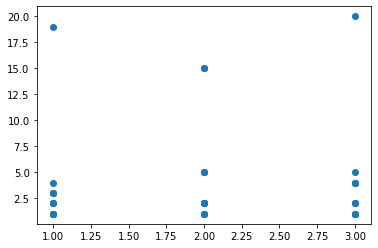

In [49]:
scatter(db.Sitio, db.Adultos)

## Bueno, por la naturaleza de los datos este tipo de graficos no nos dice mucho

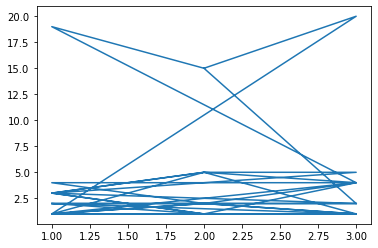

In [50]:
plot(db.Sitio, db.Adultos)

D:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).
  """Entry point for launching an IPython kernel.


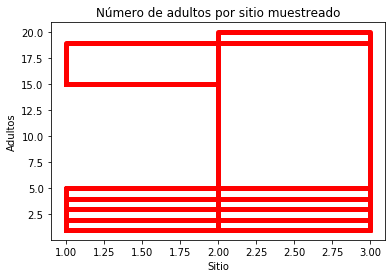

In [59]:
plot(db.Sitio, db.Adultos, color='red',linewidth=5, linestyle = 'steps')
xlabel('Sitio')
ylabel('Adultos')
title('Número de adultos por sitio muestreado')

show;

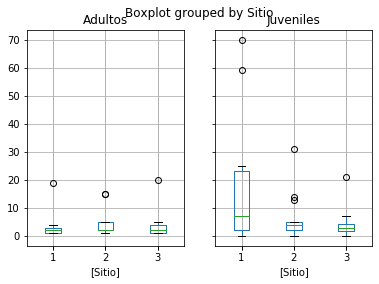

In [58]:
boxplot = db.boxplot(column=['Adultos', 'Juveniles'], by=['Sitio'])

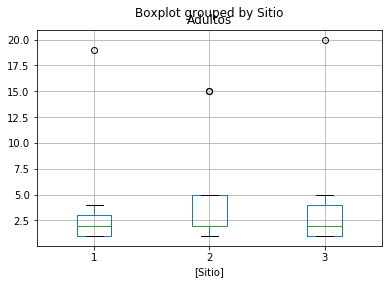

In [60]:
boxplot = db.boxplot(column=['Adultos'], by=['Sitio'])

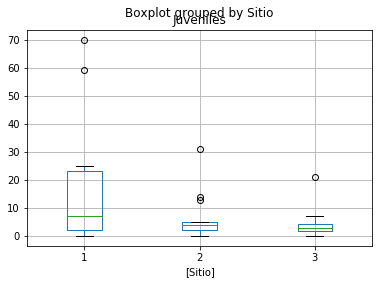

In [61]:
boxplot = db.boxplot(column=['Juveniles'], by=['Sitio'])

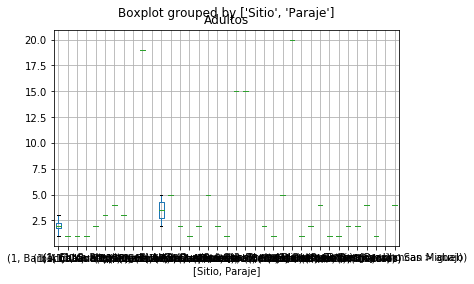

In [56]:
boxplot = db.boxplot(column=['Adultos'], by=['Sitio', 'Paraje'])

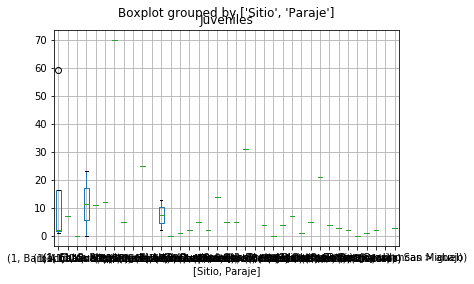

In [57]:
boxplot = db.boxplot(column=['Juveniles'], by=['Sitio', 'Paraje'])